# STEP 1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [3]:
DATA_PATH = "../data/retail_store_inventory.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["Date"])
print("Shape:", df.shape)
df.head()

Shape: (73100, 15)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
count,73100,73100,73100,73100,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100,73100.000000,73100.000000,73100
unique,NaN,5,20,5,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4
top,NaN,S001,P0001,Furniture,East,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,NaN,Spring
freq,NaN,14620,3655,14699,18349,NaN,NaN,NaN,NaN,NaN,NaN,18290,NaN,NaN,18317
mean,2022-12-31 23:59:59.999999744,NaN,NaN,NaN,NaN,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,NaN,0.497305,55.146077,NaN
min,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,NaN,0.000000,5.030000,NaN
25%,2022-07-02 00:00:00,NaN,NaN,NaN,NaN,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,NaN,0.000000,32.680000,NaN
50%,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,NaN,0.000000,55.010000,NaN
75%,2023-07-03 00:00:00,NaN,NaN,NaN,NaN,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,NaN,1.000000,77.820000,NaN
max,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,NaN,1.000000,104.940000,NaN


In [5]:
missing = df.isna().mean().sort_values(ascending=False)
print("Missing values (%):")
print(missing[missing > 0])

# Strategy:
# - Inventory Level: fill with 0 if missing (means no stock)
# - Weather Condition: forward-fill (assume same as last day)
# - Promotion/Holiday: fill with 0 (no promo/holiday)

df["Inventory Level"] = df["Inventory Level"].fillna(0)
df["Weather Condition"] = df["Weather Condition"].fillna(method="ffill")
df["Holiday/Promotion"] = df["Holiday/Promotion"].fillna(0)

Missing values (%):
Series([], dtype: float64)


C:\Users\borge\AppData\Local\Temp\ipykernel_26920\2542480848.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Weather Condition"] = df["Weather Condition"].fillna(method="ffill")


In [6]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

# Create stockout indicator
df["Stockout"] = (df["Inventory Level"] <= 0).astype(int)

# Create simple sales ratio feature
df["Sell_Through_Rate"] = df["Units Sold"] / (df["Inventory Level"] + df["Units Sold"])

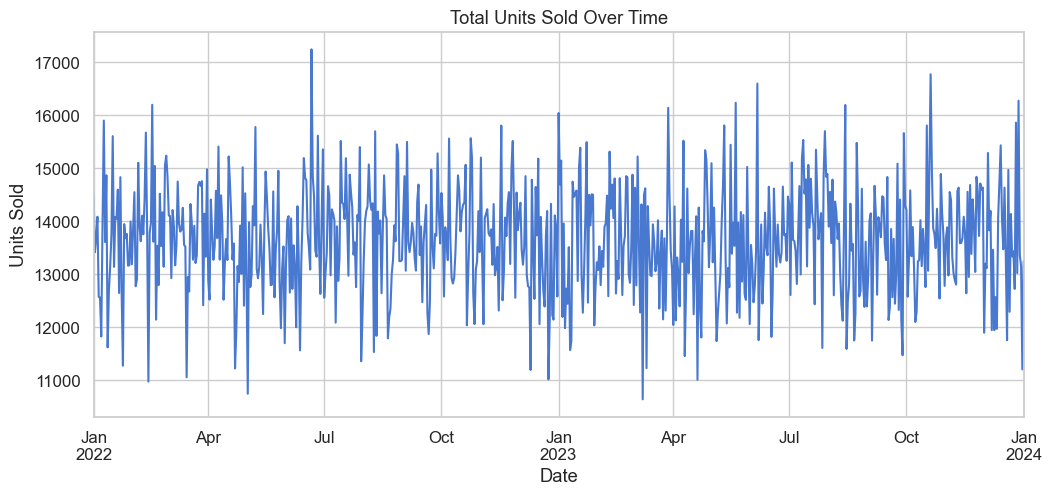

In [7]:
sales_trend = df.groupby("Date")["Units Sold"].sum()

plt.figure(figsize=(12,5))
sales_trend.plot(title="Total Units Sold Over Time")
plt.ylabel("Units Sold")
plt.show()

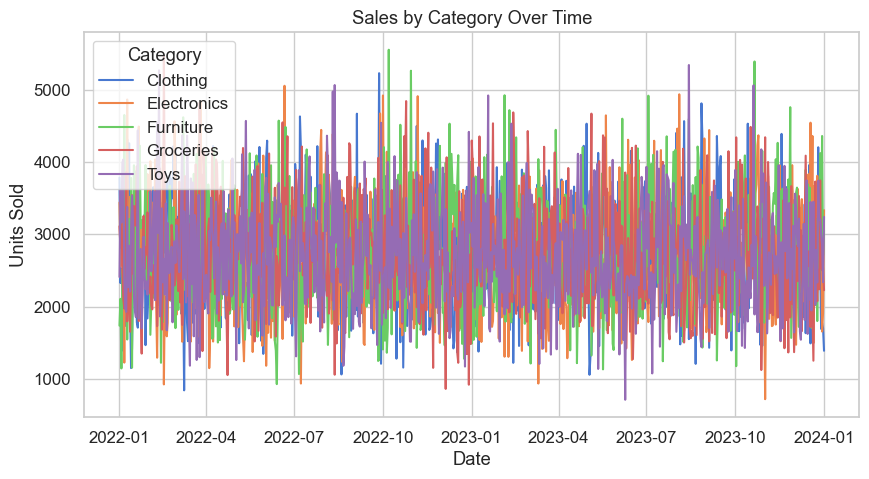

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby(["Date", "Category"])["Units Sold"].sum().reset_index(),
             x="Date", y="Units Sold", hue="Category")
plt.title("Sales by Category Over Time")
plt.show()

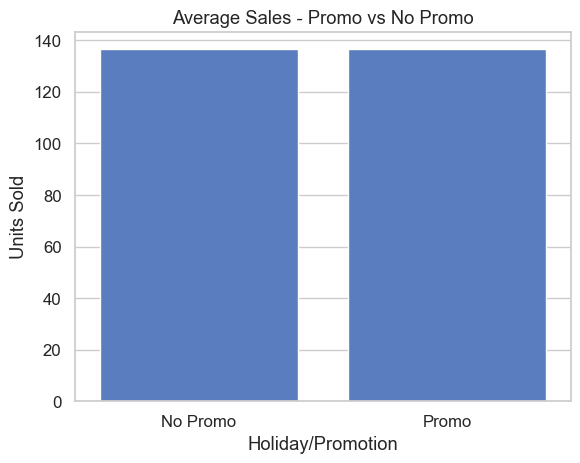

In [9]:
promo_sales = df.groupby("Holiday/Promotion")["Units Sold"].mean()
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title("Average Sales - Promo vs No Promo")
plt.ylabel("Units Sold")
plt.xticks([0,1], ["No Promo", "Promo"])
plt.show()

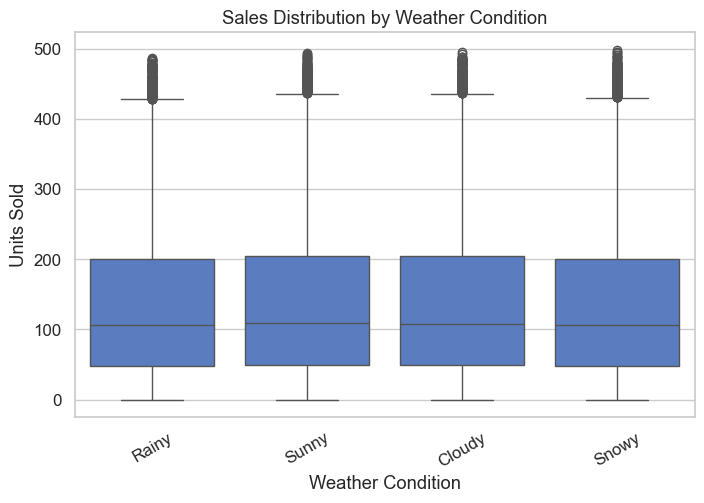

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Weather Condition", y="Units Sold")
plt.title("Sales Distribution by Weather Condition")
plt.xticks(rotation=30)
plt.show()


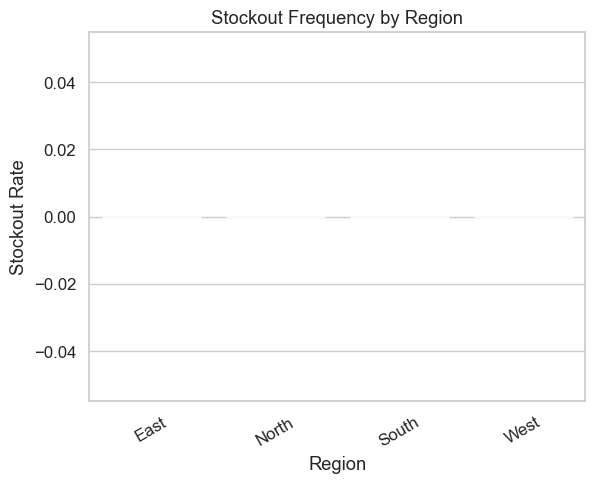

In [11]:
stockouts = df.groupby("Region")["Stockout"].mean().sort_values(ascending=False)
sns.barplot(x=stockouts.index, y=stockouts.values)
plt.title("Stockout Frequency by Region")
plt.ylabel("Stockout Rate")
plt.xticks(rotation=30)
plt.show()


In [12]:
CLEAN_PATH = "../data/retail_store_inventory_clean.csv"
df.to_csv(CLEAN_PATH, index=False)
print(f"✅ Cleaned dataset saved to {CLEAN_PATH}")


✅ Cleaned dataset saved to ../data/retail_store_inventory_clean.csv
